## Introduction

For this project I am working with information from spotify. The data includes different descriptive statistics of tracks and seeks to classify those tracks as hits or flops. The target is a binary variable indicating if a track was a hit. For a full overview of the column meanings, there is a readme file inside the archive folder. This file goes over all of the variables as well as defines the criteria for a track being labeled a hit. The end goal will be to see if a recording label is able to indicate whether a track is likely to comercially succeed before being officially released. I will be using the classifications systems within the sci-kit learn library to process the data and classify the tracks. To begin I load the relevant modules and load in the data.

## Load Libraries, Define Helper Functions and Load Data

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
sns.set(font_scale=1.5, style='dark')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_roc_curve
from sklearn.feature_selection import RFE

import eli5
from eli5.sklearn import PermutationImportance

np.random.seed(123)

/Users/rlathbury/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/rlathbury/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
/Users/rlathbury/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorfl

We will also import some helper functions from classifier_functions.py.

In [2]:
%run classifier_functions.py

The data is contained in 5 csv files, and each one contains tracks from a decade. We will load each one in, and merge them into one dataframe.

In [3]:
df_10s = pd.read_csv('archive/dataset-of-10s.csv')
df_10s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


In [4]:
df_00s = pd.read_csv('archive/dataset-of-00s.csv')
df_00s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [5]:
df_90s = pd.read_csv('archive/dataset-of-90s.csv')
df_90s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [6]:
df_80s = pd.read_csv('archive/dataset-of-80s.csv')
df_80s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Walking Blues,Big Joe Williams,spotify:track:1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0
3,The Wild Rover,The Pogues,spotify:track:6JyYNPLalPgGa7XnclF5FO,0.656,0.512,7,-11.872,1,0.0290,0.585,0.00000,0.0720,0.880,97.500,157893,3,50.97022,7,0
4,In The Driver's Seat,John Schneider,spotify:track:6jJi8OXF5qaFdysB6sjWIT,0.642,0.889,2,-5.620,0,0.0494,0.375,0.00000,0.1800,0.764,163.351,162293,4,33.62053,7,1


In [7]:
df_70s = pd.read_csv('archive/dataset-of-70s.csv')
df_70s.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Porque?,Reginaldo Rossi,spotify:track:28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,Free Jazz,Maria Teresa Luciani,spotify:track:0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,Reject of Society,Crass,spotify:track:18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,Yeah !,The Jets,spotify:track:1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,Gotta Find A Way,The Moments,spotify:track:1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1


In [8]:
df_combined = pd.concat([df_10s, df_00s, df_90s, df_80s, df_70s], axis = 0, ignore_index=True)
print(len(df_combined), "Total tracks")
df_combined.head()

32464 Total tracks


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000,0.0828,0.706,108.029,188493,4,41.18681,10,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814,0.0946,0.250,155.489,176880,3,33.18083,9,0
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000,0.1080,0.274,172.065,205463,4,44.89147,9,1
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000,0.2040,0.291,91.837,193043,4,29.52521,7,0
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000,0.3910,0.780,160.517,144244,4,24.99199,8,1


Before we get much farther, I want to see how hits we have per decade.

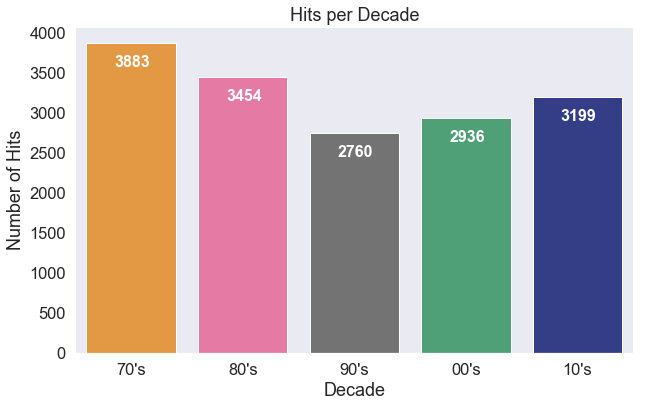

In [9]:
hits_by_decade = [df.target.value_counts()[1] for df in [df_70s, df_80s, df_90s, df_00s, df_10s]]
decades = ["70's", "80's", "90's", "00's", "10's"]

palette = ['#fe9929', '#f768a1', '#737373', '#41ae76', '#253494']
plt.figure(figsize=(10,6))
sns.barplot(x=decades, y=hits_by_decade, palette=palette)
for i, v in enumerate(hits_by_decade):
    plt.text(i-.15, v-300, v, color='white', fontweight='bold', size = 16)
plt.title('Hits per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Hits')
plt.show()

It looks like the hits are not evenly distributed between decades with many more in the 70s that the last three decades. this shouldn't impact our data, but is something to consider.

## Clean the Data

Now that our data is loaded in, lets check for missing values or unexpected data types.

In [10]:
df_combined.isna().any().any()

False

In [11]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32464 entries, 0 to 32463
Data columns (total 19 columns):
track               32464 non-null object
artist              32464 non-null object
uri                 32464 non-null object
danceability        32464 non-null float64
energy              32464 non-null float64
key                 32464 non-null int64
loudness            32464 non-null float64
mode                32464 non-null int64
speechiness         32464 non-null float64
acousticness        32464 non-null float64
instrumentalness    32464 non-null float64
liveness            32464 non-null float64
valence             32464 non-null float64
tempo               32464 non-null float64
duration_ms         32464 non-null int64
time_signature      32464 non-null int64
chorus_hit          32464 non-null float64
sections            32464 non-null int64
target              32464 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 4.7+ MB


Everything looks good here. Now let's look at some descriptive statistics.

In [12]:
df_combined.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000,32464.000000,3.246400e+04,32464.000000,32464.000000,32464.000000,32464.000000
mean,0.552347,0.615305,5.250092,-9.740177,0.676780,0.075771,0.297285,0.155613,0.198341,0.533783,120.459754,2.485176e+05,3.914213,40.416920,10.899304,0.500000
std,0.179654,0.248646,3.556396,5.290018,0.467713,0.082309,0.320068,0.303915,0.173740,0.265101,28.966311,1.197645e+05,0.388277,19.375935,4.920468,0.500008
min,0.057600,0.000251,0.000000,-49.253000,0.000000,0.022000,0.000000,0.000000,0.013000,0.000000,34.535000,1.592000e+04,0.000000,0.000000,0.000000,0.000000
25%,0.434000,0.446000,2.000000,-12.298250,0.000000,0.034200,0.021700,0.000000,0.091800,0.322000,98.370500,1.929035e+05,4.000000,27.768375,8.000000,0.000000
50%,0.567000,0.649000,5.000000,-8.608500,1.000000,0.045200,0.159000,0.000156,0.128000,0.548000,119.044000,2.306930e+05,4.000000,36.025740,10.000000,0.500000
75%,0.683000,0.820000,8.000000,-5.944000,1.000000,0.076000,0.531000,0.067125,0.256000,0.755000,137.949000,2.774298e+05,4.000000,47.805113,12.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.956000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,1.000000


After looking at the statistics, I have a few concerns. First, I want to look at our time_signature column. I have a feeling we should treat this as a categorical column.

In [13]:
df_combined.time_signature.value_counts()

4    29353
3     2445
5      415
1      249
0        2
Name: time_signature, dtype: int64

As expected it should be treated categorically, as the variable isn't really continuous. Also, I am going to drop the two points where the time signature is zero as there is an extremely small sample size.

In [14]:
df_combined = df_combined[df_combined.time_signature != 0]
df_combined.time_signature.value_counts()

4    29353
3     2445
5      415
1      249
Name: time_signature, dtype: int64

Now let's look at the mode column as it appears to be binary as well.

In [15]:
df_combined['mode'].value_counts()

1    21969
0    10493
Name: mode, dtype: int64

Mode will be treated categorically as well as it is binary. The last column I want to look at for now is the target variable. Let's see how balanced our data is.

In [16]:
df_combined.target.value_counts()

1    16232
0    16230
Name: target, dtype: int64

The target variable is very balanced with nearly even numbers of hits and flops. I expect our data may have been oversampled to make this even, but that is fine for the purposes of creating a classifier. The real test will be if our classifier is as effective in an unbalanced sample, but that will be a future project.

Now we will take a look at the distributions of our predictors to get an idea of our next steps.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc12851eeb8>,
      dtype=object)

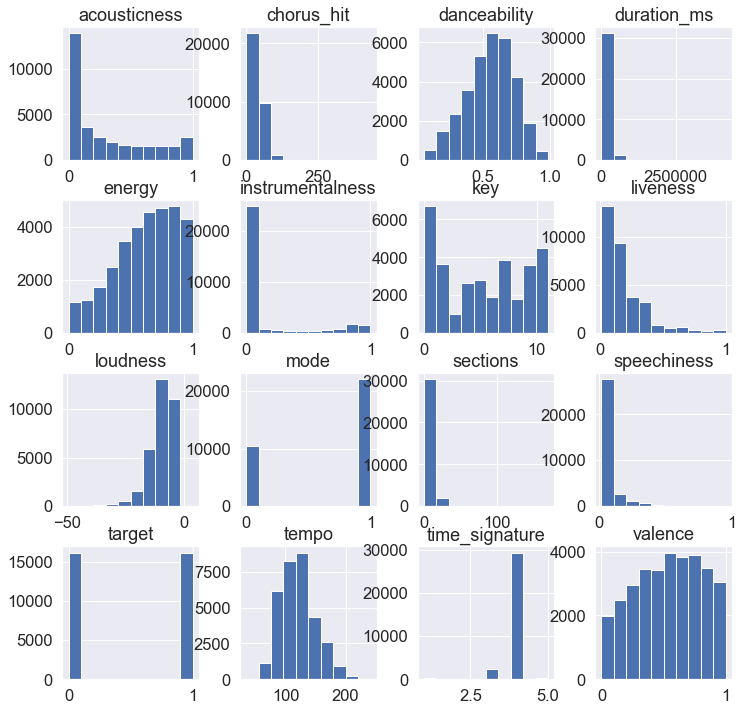

In [17]:
df_combined.hist(figsize=(12,12))

Are data is definitely not normally distributed in most columns, but that shouldn't be too much of a problem. That being said, there are a few columns I want to look at here. I am most concerned with the duration_ms column, as 4,000,000 ms is over an hour. I expect some extreme outliers here, but let's take a look.

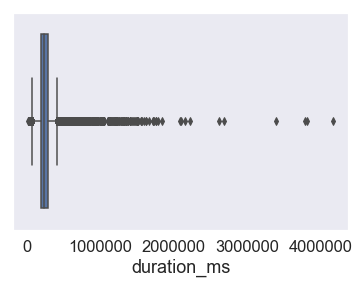

In [18]:
sns.boxplot(x=df_combined.duration_ms)

As expected, there are quite a few outliers, many of them very far outside the norm. Let's see how many outliers there are, and also check the target distribution among them. I imagine there will be more flops than hits when tracks are that long.

In [19]:
duration_outliers = df_combined[df_combined['duration_ms'] >= 500000]
len(duration_outliers)

754

In [20]:
duration_outliers.target.value_counts()

0    673
1     81
Name: target, dtype: int64

The number of outliers is not extreme considering the size of the dataset, we can remove them pretty easily here. This will slightly unbalance the distribution of target variables slightly, but not enough where we will need to resample. Before we cut this data out, let's look at a few more columns.

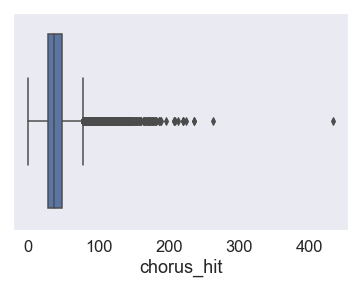

In [21]:
sns.boxplot(x=df_combined.chorus_hit)

We see some outliers here too, lets see some stats on these too.

In [22]:
chorus_outliers = df_combined[df_combined['chorus_hit'] >= 100]
len(chorus_outliers)

500

In [23]:
chorus_outliers.target.value_counts()

0    317
1    183
Name: target, dtype: int64

Looks like we have pretty similar numbers here, and I expect some of these outliers overlap. There is one more column that I want to look at before I make changes to the data. Let's look at the sections column.

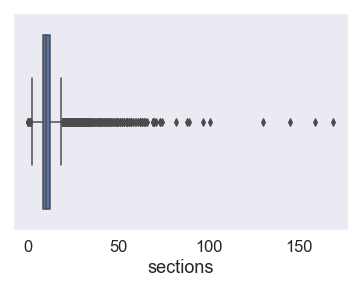

In [24]:
sns.boxplot(x=df_combined.sections)

In [25]:
sections_outliers = df_combined[df_combined['sections'] >= 25]
len(sections_outliers)

478

In [26]:
sections_outliers.target.value_counts()

0    451
1     27
Name: target, dtype: int64

Again we see similar numbers, I still expect to see a lot of overlap between these outliers. At this point, lets remove the duration_ms outliers and recheck these columns.

In [27]:
df_combined = df_combined.drop(duration_outliers.index)
chorus_outliers = df_combined[df_combined['chorus_hit'] >= 100]
sections_outliers = df_combined[df_combined['sections'] >= 25]

print(len(df_combined), 'Tracks')
print(len(chorus_outliers), 'Outliers in chorus_hit')
print(len(sections_outliers), 'Outliers in section')

31708 Tracks
474 Outliers in chorus_hit
51 Outliers in section


Well there was a good bit of overlap between section and duration outliers. We can probably safely keep in the rest of the section outliers, but let's go ahead and remove the chorus outliers.

In [28]:
df_combined = df_combined.drop(chorus_outliers.index)
sections_outliers = df_combined[df_combined['sections'] >= 25]

print(len(df_combined), 'Tracks')
print(len(sections_outliers), 'Outliers in section')

31234 Tracks
51 Outliers in section


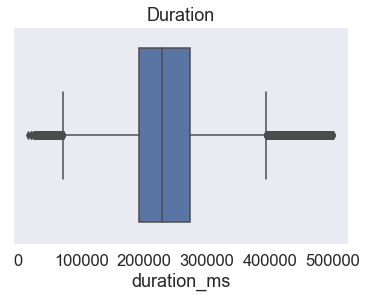

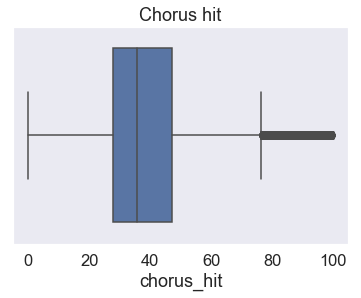

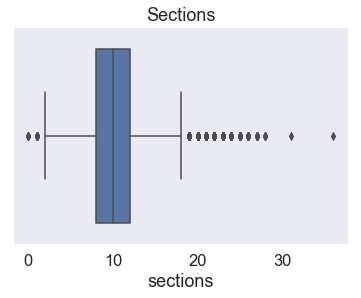

In [29]:
sns.boxplot(x = df_combined.duration_ms)
plt.title('Duration')
plt.show()
sns.boxplot(x = df_combined.chorus_hit)
plt.title('Chorus hit')
plt.show()
sns.boxplot(x = df_combined.sections)
plt.title('Sections')
plt.show()

We still have some outliers, but they are much less extreme now. I don't want to lose much more of the data as we have already lost about 1200 tracks. Let's check distributions again.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc12a7a6240>,
      dtype=object)

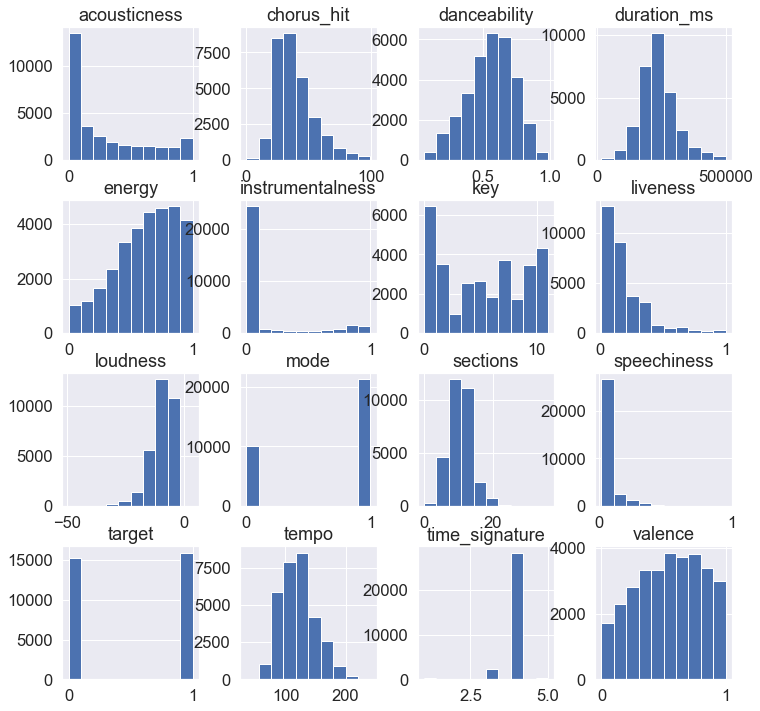

In [30]:
df_combined.hist(figsize=(12,12))

We have definitely cleaned up those categories to look less skewed, and our target is still balanced. At this point the data is cleaned up nicely, let's explore some relationships.

### EDA

Lets explore the data. First off, I want to see the correlations between categories.

Text(0.5, 1.0, 'Corellation Heatmap')

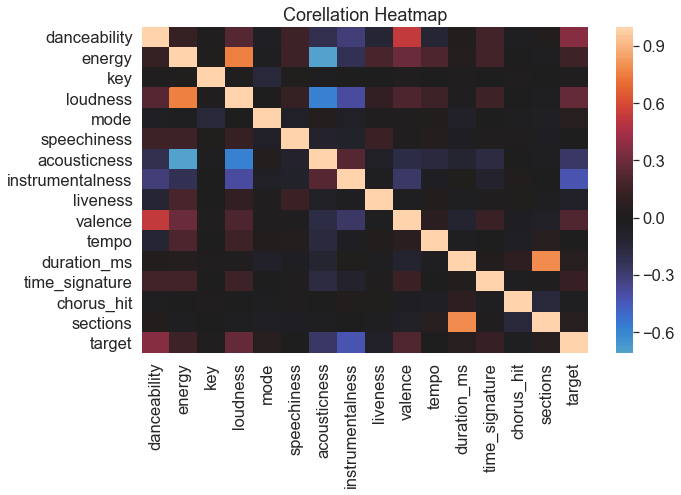

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df_combined.corr(), center=0)
plt.title('Corellation Heatmap')

From this heatmap, there are a few interactions I want to take a closer looks at. First I want to look at the strong negative correlations between acousticness and loudness, and acousticness and energy. Let's plot those now.

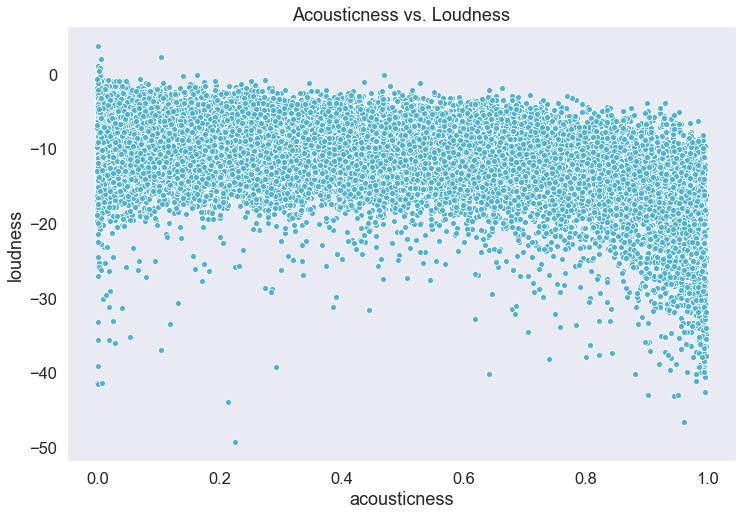

In [32]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_combined.acousticness, y=df_combined.loudness, color='#4eb3d3')
plt.title('Acousticness vs. Loudness')
plt.show()

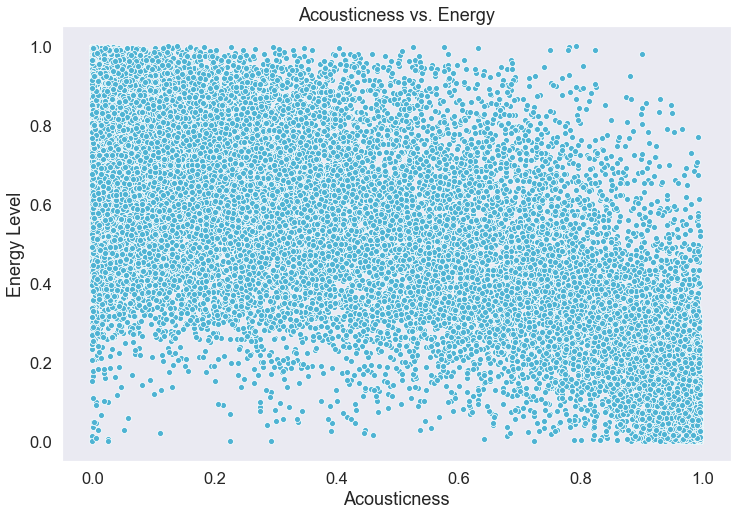

In [33]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_combined.acousticness, y=df_combined.energy, color='#4eb3d3')
plt.title('Acousticness vs. Energy')
plt.xlabel('Acousticness')
plt.ylabel('Energy Level')
plt.show()

In both of these graphs you can clearly see the negative correlation, although it is definitely clearer in the plot of acousticness and loudness. This makes logical sense as acoustic music tends to be quieter and more relaxed. These relationships may need to be mitigated with our model, as they may contribute to multicollinearity. From the correlation heat map we also see a strong relationship between energy and loudness, let's take a closer look at that as well.

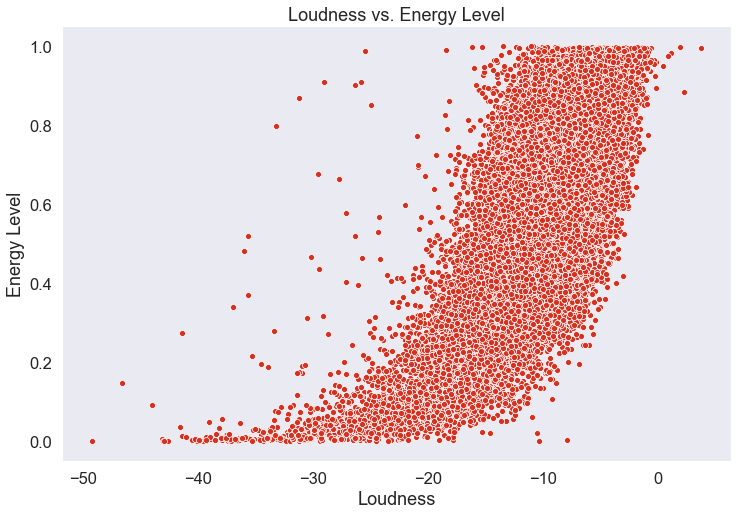

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_combined.loudness, y=df_combined.energy, color='#d7301f')
plt.title('Loudness vs. Energy Level')
plt.xlabel('Loudness')
plt.ylabel('Energy Level')
plt.show()

The correlation is extremely strong here, and this makes sense. By our definition, energetic tracks are perceived as louder. Again we will need to look at diminishing our multicollinearity when we model our classifier. I want to see one more relationship, that between the duration of a track and the number of sections it contains.

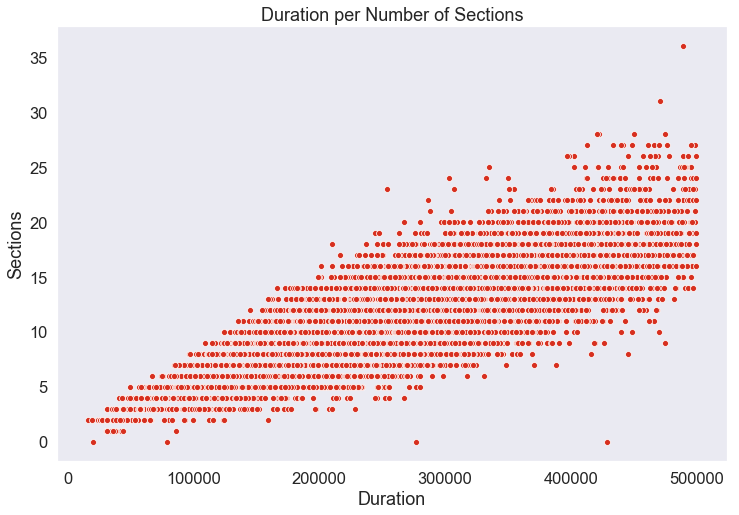

In [35]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df_combined.duration_ms, y=df_combined.sections, color='#d7301f')
plt.title('Duration per Number of Sections')
plt.xlabel('Duration')
plt.ylabel('Sections')
plt.show()

Again there is a clear relationship at work here, nd again this makes logical sense. As a track gets longer, it has more room for sections, and we saw this effect when dealing with our outliers above. 

During modeling, we will attempt to use PCA to decompose our variables and eliminate some of our multicollinearity.

Now I will split the data into the target and predictor variables. I will also create our train and test samples here.

In [36]:
target = df_combined.target
data = df_combined.drop(['track', 'artist', 'uri', 'target'], axis=1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=.30)

In [38]:
X_train.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
count,21863.000000,21863.000000,21863.000000,21863.000000,21863.000000,21863.000000,21863.000000,21863.000000,21863.000000,21863.000000,21863.000000,21863.000000,21863.000000,21863.000000,21863.000000
mean,0.557088,0.618900,5.258382,-9.622674,0.674473,0.075609,0.293230,0.148775,0.195812,0.541582,120.783943,235654.441888,3.915245,39.056561,10.472991
std,0.177418,0.246837,3.560239,5.224664,0.468582,0.081812,0.317744,0.298470,0.170561,0.262921,28.849674,71862.329238,0.384373,15.969443,3.273520
min,0.059600,0.000251,0.000000,-49.253000,0.000000,0.022000,0.000000,0.000000,0.013000,0.000000,34.535000,19533.000000,1.000000,0.000000,0.000000
25%,0.441000,0.451000,2.000000,-12.133000,0.000000,0.034100,0.021500,0.000000,0.091400,0.333000,98.994500,191524.000000,4.000000,27.661645,8.000000
50%,0.573000,0.653000,5.000000,-8.526000,1.000000,0.044900,0.155000,0.000120,0.127000,0.555000,119.610000,228307.000000,4.000000,35.712090,10.000000
75%,0.685500,0.822000,9.000000,-5.867000,1.000000,0.075500,0.520000,0.050750,0.253000,0.761000,138.059000,271393.500000,4.000000,47.096780,12.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.956000,0.996000,1.000000,0.999000,0.996000,217.943000,499333.000000,5.000000,99.911750,36.000000


Now we need to scale our continuous variables and make dummies for our time_signature column.

In [39]:
scaler = StandardScaler()
train_dummies = pd.get_dummies(X_train['time_signature'], prefix='time_signature')
train_cat = pd.concat([train_dummies, X_train['mode']], axis=1)


train_cont_var = X_train.drop(['time_signature', 'mode'], axis=1)
train_scaled = pd.DataFrame(scaler.fit_transform(train_cont_var), index=train_cont_var.index, columns = train_cont_var.columns)


X_train = pd.concat([train_scaled, train_cat], axis=1)
X_train.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,sections,time_signature_1,time_signature_3,time_signature_4,time_signature_5,mode
3699,-0.620516,1.122631,1.050970,0.775699,1.190456,-0.816180,-0.498473,4.023219,-0.032642,1.839510,-0.161249,-0.371687,-1.366447,0,0,1,0,1
6740,1.515727,0.207025,-0.915235,0.777804,1.141562,-0.897757,-0.498473,1.754182,0.960072,-1.621440,-0.130272,-0.381616,-0.755470,0,0,1,0,1
21028,-0.107592,1.126682,1.612743,0.369156,-0.438932,-0.922658,2.061311,-0.672574,0.594936,-0.197648,1.441297,0.557155,0.466484,0,0,1,0,1
6308,-1.527996,1.264428,1.612743,-0.237021,0.013336,-0.917836,2.523680,0.012828,-1.748023,1.864641,0.825466,-0.601433,1.688438,0,0,1,0,1
25842,0.185507,-2.137492,-0.915235,-0.820995,-0.459712,2.164589,-0.498272,-0.503129,-1.150873,-0.959927,-0.283151,0.399836,-0.144493,0,0,1,0,1


We will now apply the same scaling to the test variables and again get dummies for time_signature.

In [40]:
test_dummies = pd.get_dummies(X_test['time_signature'], prefix='time_signature')
test_cat = pd.concat([test_dummies, X_test['mode']], axis=1)

test_cont_var = X_test.drop(['time_signature', 'mode'], axis=1)
test_scaled = pd.DataFrame(scaler.transform(test_cont_var), index=test_cont_var.index, columns = test_cont_var.columns)

X_test = pd.concat([test_scaled, test_cat], axis=1)
X_test.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,sections,time_signature_1,time_signature_3,time_signature_4,time_signature_5,mode
32281,0.557518,-0.100877,1.050970,-0.261903,-0.464602,-0.126615,-0.495440,-0.450361,0.899216,-0.777425,-1.173402,-0.908614,-0.755470,0,0,1,0,1
5093,1.284629,-0.190007,-0.915235,0.405523,0.579283,-0.734666,-0.498473,0.130090,-0.196193,-0.719884,-0.005155,-1.203197,0.160995,0,0,1,0,1
9049,-0.457056,-0.712631,1.050970,0.394230,-0.579502,-0.592410,-0.498446,-0.426908,-1.432332,-1.660228,0.648095,0.047681,0.466484,0,0,1,0,1
20431,0.698431,0.624315,-0.915235,0.683634,-0.215243,-0.359512,-0.498411,0.675363,0.020607,-0.017607,0.013715,-0.184205,-0.144493,0,0,1,0,1
11550,0.963347,0.697239,-1.477008,1.485809,0.432601,-0.494845,-0.498473,-0.491403,0.419975,-1.514227,0.206129,1.565331,-0.144493,0,0,1,0,1


And now we are ready to start modeling.

## Modeling

We will be using five different classification methods for modeling: logestic regression, k-nearest neighbors, support vector machines, random forests and adaboost. To start with we will run these models at default settings to develop a baseline. Then we will try tuning the models to get better accuracy scores.

### Baseline modeling



In [41]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
svm = SVC() 
ran_for = RandomForestClassifier() 
ada = AdaBoostClassifier()

classifiers = [log_reg, knn, svm, ran_for, ada]
names = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest', 'Adaboost']
baselines = clf_fit(classifiers, names, X_train, X_test, y_train, y_test)
baselines

,classifier,train_score,test_score
0,Logistic Regression,0.749440,0.753495
1,KNN,0.820153,0.749546
2,SVM,0.803549,0.790204
3,Random Forest,0.999131,0.799701
4,Adaboost,0.780863,0.776438


It looks like our random forest classifier had the best testing accuracy, predicting nearly 80% of our tracks correctly. When we compare all of these models to random chance (50% of a correct guess) they all seem like strong classifiers. Lets try incorporating PCA now to see if reducing the dimensionality of our data will improve our accuracy.

### PCA Modeling

In [42]:
from sklearn.decomposition import PCA
components = list(range(18))
for n in components:
    pca = PCA(n_components=int(n))
    principle_components = pca.fit_transform(X_train)
    var = np.sum(pca.explained_variance_ratio_)
    print('{} components, {} variance explained'.format(n, round(var, 2)))

0 components, 0.0 variance explained
1 components, 0.22 variance explained
2 components, 0.36 variance explained
3 components, 0.47 variance explained
4 components, 0.55 variance explained
5 components, 0.62 variance explained
6 components, 0.7 variance explained
7 components, 0.77 variance explained
8 components, 0.83 variance explained
9 components, 0.89 variance explained
10 components, 0.92 variance explained
11 components, 0.95 variance explained
12 components, 0.97 variance explained
13 components, 0.98 variance explained
14 components, 0.99 variance explained
15 components, 1.0 variance explained
16 components, 1.0 variance explained
17 components, 1.0 variance explained


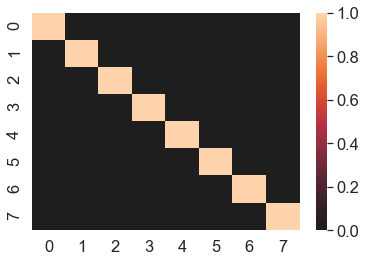

In [43]:
pca = PCA(n_components=8)
pca_X_train = pd.DataFrame(pca.fit_transform(X_train))
sns.heatmap(pca_X_train.corr(), center=0)

I will decompose the predictors to 8 components for PCA usage.

In [44]:
pca_X_test = pca.transform(X_test)

In [45]:
pca_names = []
for name in names:
    pca_names.append('PCA ' + name)
pca_models = clf_fit(classifiers, pca_names, pca_X_train, pca_X_test, y_train, y_test)
pca_models

,classifier,train_score,test_score
0,PCA Logistic Regression,0.694827,0.699285
1,PCA KNN,0.803961,0.720094
2,PCA SVM,0.760280,0.751361
3,PCA Random Forest,0.999177,0.755629
4,PCA Adaboost,0.726341,0.732259


It looks like our testing scores all got worse when using PCA. This isn't too surprising as we don't have a high number of predictors. For now let's try to tune our baseline models. To make our results clearer, we will create an empty dictionary to store individual results in and a list to store models in.

In [46]:
best_aucs = {}
best_models= []

Now we will use GridsearchCV to tune the parameters of each of our models. After finding our ideal model, we will generate predictions, plot a confusion matrix, and then store the auc for the training and testing sets.

### Fine Tuning Logistic Regression

For logistic regression we will tune the C and class weight parameters.

In [47]:
start = datetime.datetime.now()

logreg = LogisticRegression()
logreg_param_grid = {'C':[1,2,5,7,10],
                     'class_weight': ['balanced', None]}
logreg_gridsearch = grid_fit(logreg, logreg_param_grid, X_train, y_train)

end = datetime.datetime.now()
print(f'Time elapsed: {end-start}')

Best params: {'C': 5, 'class_weight': 'balanced'}
Best score: 0.7487995076767588
Time elapsed: 0:00:03.888633


In [48]:
best_C = logreg_gridsearch.best_params_['C']
best_weight = logreg_gridsearch.best_params_['class_weight']

best_logreg = LogisticRegression(C=best_C, class_weight=best_weight)
best_logreg.fit(X_train, y_train)

logreg_train_preds = best_logreg.predict(X_train)
logreg_test_preds = best_logreg.predict(X_test)

Classification Report - Training
              precision    recall  f1-score   support

           0       0.79      0.67      0.72     10674
           1       0.72      0.83      0.77     11189

    accuracy                           0.75     21863
   macro avg       0.76      0.75      0.75     21863
weighted avg       0.75      0.75      0.75     21863

Classification Report - Testing
              precision    recall  f1-score   support

           0       0.79      0.69      0.73      4589
           1       0.73      0.82      0.77      4782

    accuracy                           0.75      9371
   macro avg       0.76      0.75      0.75      9371
weighted avg       0.76      0.75      0.75      9371

Training AUC: 0.755, Testing AUC: 0.759
Confusion Matrix - Training


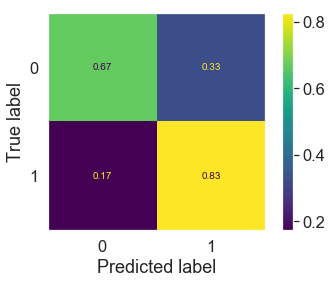

Confusion Matrix - Testing


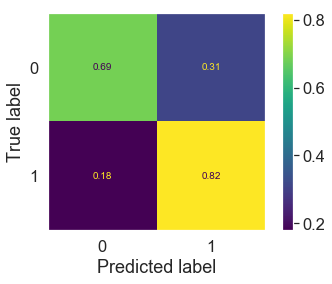

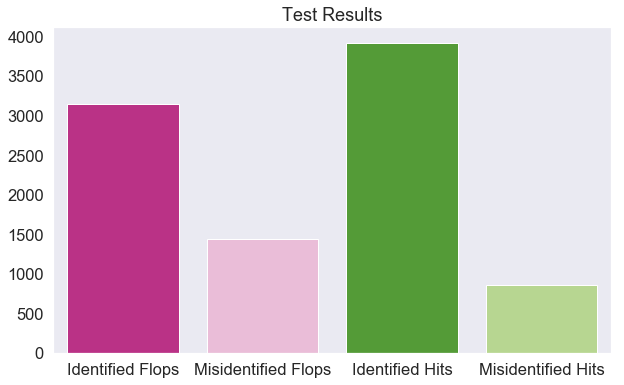

In [49]:
logreg_auc_train, logreg_auc_test = classifier_results(best_logreg,
                                                       X_train, 
                                                       X_test, 
                                                       y_train, 
                                                       y_test, 
                                                       logreg_train_preds, 
                                                       logreg_test_preds)

We have good accuracy on both training and test sets and good precision across the board. Our recall is decent, but shows that the model was more likely to classify a track as a hit than as a flop. The confusion matrices show that our true positive and negative rates are fairly high, while our false positive and negative rates are fairly low. The model does show the tendency to overclassify tracks as positive, showing a higher false positive rate than a false negative rate. Our logistic regression model has a 76% chance to separate hits from flops as evidenced by our testing AUC. Thats not bad compared to 50% of random chance. Overall, this is a good model with some room for improvement.

In [50]:
best_aucs['logreg'] =[logreg_auc_train, logreg_auc_test]
best_models.append(best_logreg)

### Fine Tuning KNN

We will be tuning the 'n_neighbors', 'metric', and 'weights' parameters for our k-nearest neighbors model.

In [51]:
start = datetime.datetime.now()

knn = KNeighborsClassifier()
knn_param_grid = {'n_neighbors':[5,10,20,30,40,50],
              'metric': ['manhattan', 'euclidean','minkowski'],
              'weights': ['uniform', 'distance']}

knn_gridsearch = grid_fit(knn, knn_param_grid, X_train, y_train)

end = datetime.datetime.now()
print(f'Time elapsed: {end-start}')

Best params: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'uniform'}
Best score: 0.7675980590569967
Time elapsed: 0:07:49.814110


In [52]:
best_metric = knn_gridsearch.best_params_['metric']
best_neighbors = knn_gridsearch.best_params_['n_neighbors']
best_weights = knn_gridsearch.best_params_['weights']

best_knn = KNeighborsClassifier(metric=best_metric, n_neighbors=best_neighbors, weights=best_weights)
best_knn.fit(X_train, y_train)

knn_train_preds = best_knn.predict(X_train)
knn_test_preds = best_knn.predict(X_test)

Classification Report - Training
              precision    recall  f1-score   support

           0       0.88      0.66      0.75     10674
           1       0.74      0.91      0.82     11189

    accuracy                           0.79     21863
   macro avg       0.81      0.79      0.78     21863
weighted avg       0.81      0.79      0.78     21863

Classification Report - Testing
              precision    recall  f1-score   support

           0       0.86      0.63      0.73      4589
           1       0.72      0.90      0.80      4782

    accuracy                           0.77      9371
   macro avg       0.79      0.77      0.76      9371
weighted avg       0.79      0.77      0.77      9371

Training AUC: 0.807, Testing AUC: 0.79
Confusion Matrix - Training


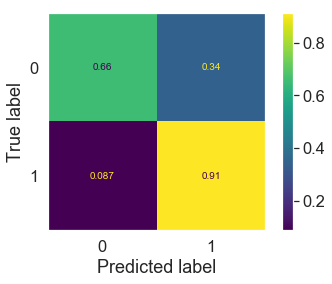

Confusion Matrix - Testing


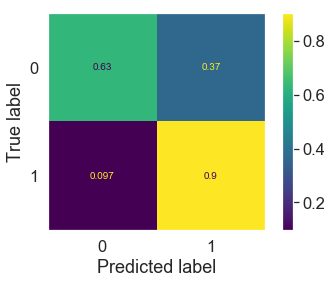

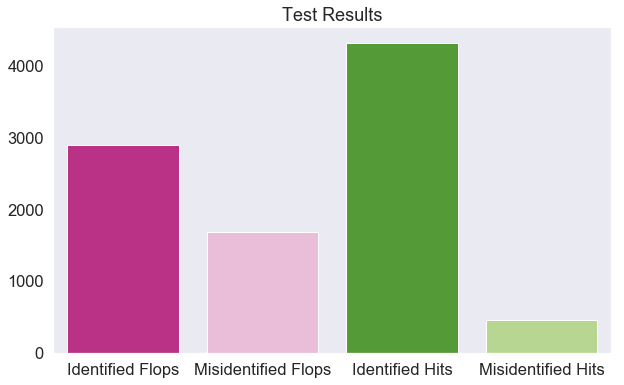

In [53]:
knn_auc_train, knn_auc_test = classifier_results(best_knn, 
                                                 X_train, 
                                                 X_test, 
                                                 y_train, 
                                                 y_test, 
                                                 knn_train_preds, 
                                                 knn_test_preds)

Again we have a fairly good model. We have high accuracy and precision with a tendency towards high false positive rates. The AUC is higher than the logistic regression model showing the knn model to have a 79% chance of separating hits from flops. The main draw of this model is the 90% accuracy in regards to correctly identifing true positives. I would choose this model over the logistic regression model, but I would also be wary of that very high false postive rate.

In [54]:
best_aucs['knn'] = [knn_auc_train, knn_auc_test]
best_models.append(best_knn)

### Fine Tuning SVM

For our support vector machine model we will tune the 'C', 'class_weight' and 'gamma' parameters.

In [55]:
start = datetime.datetime.now()

svm = SVC()
svm_param_grid = {'C':[.1, 1, 5, 10],
                  'class_weight':['balanced', None],
                  'gamma': [.001, .01, .1]}

svm_gridsearch = grid_fit(svm, svm_param_grid, X_train, y_train)

end = datetime.datetime.now()
print(f'Time elapsed: {end-start}')

Best params: {'C': 1, 'class_weight': None, 'gamma': 0.1}
Best score: 0.7876778695209846
Time elapsed: 0:15:42.800610


In [56]:
best_C = svm_gridsearch.best_params_['C']
best_weight = svm_gridsearch.best_params_['class_weight']
best_gamma = svm_gridsearch.best_params_['gamma']

best_svm = SVC(C=best_C, class_weight=best_weight, gamma=best_gamma)
best_svm.fit(X_train, y_train)

svm_train_preds = best_svm.predict(X_train)
svm_test_preds = best_svm.predict(X_test)

Classification Report - Training
              precision    recall  f1-score   support

           0       0.87      0.73      0.79     10674
           1       0.77      0.89      0.83     11189

    accuracy                           0.81     21863
   macro avg       0.82      0.81      0.81     21863
weighted avg       0.82      0.81      0.81     21863

Classification Report - Testing
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      4589
           1       0.76      0.87      0.81      4782

    accuracy                           0.79      9371
   macro avg       0.80      0.79      0.79      9371
weighted avg       0.80      0.79      0.79      9371

Training AUC: 0.82, Testing AUC: 0.8
Confusion Matrix - Training


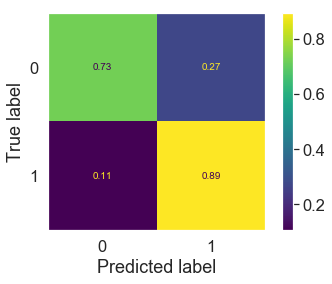

Confusion Matrix - Testing


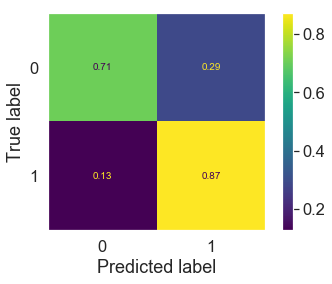

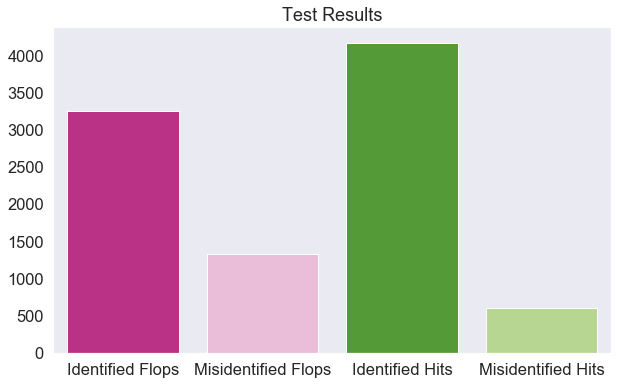

In [57]:
svm_auc_train, svm_auc_test = classifier_results(best_svm, 
                                                 X_train, 
                                                 X_test, 
                                                 y_train,
                                                 y_test, 
                                                 svm_train_preds, 
                                                 svm_test_preds)

We have the best AUC so far showing the svm model to have an 80% chance of separating flops from hits. This model also has the best false positive rate so far, although it is still a bit higher than I would like. This is an all-around better model than the KNN and logistic regression models.

In [58]:
best_aucs['svm'] = [svm_auc_train, svm_auc_test]
best_models.append(best_svm)

### Fine Tuning Random Forest

For random forests, we will tune the 'n_estimators', 'max_depth', 'criterion', 'min_samples_split' and 'min_samples_leaf' parameters.

In [59]:
start = datetime.datetime.now()

forest = RandomForestClassifier()
forest_param_grid = {'n_estimators': [10, 50, 100, 150],
                      'max_depth': [5, 10, 15],
                      'criterion': ['entropy', 'gini'],
                      'min_samples_split': [.01, .05, .1, .2],
                      'min_samples_leaf': [.01, .05, .1, .2]}

forest_gridsearch = grid_fit(forest, forest_param_grid, X_train, y_train)

end = datetime.datetime.now()
print(f'Time elapsed: {end-start}')

Best params: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 150}
Best score: 0.7820064147938797
Time elapsed: 0:18:44.095422


In [60]:
best_criterion = forest_gridsearch.best_params_['criterion']
best_depth = forest_gridsearch.best_params_['max_depth']
best_leaf = forest_gridsearch.best_params_['min_samples_leaf']
best_split = forest_gridsearch.best_params_['min_samples_split']
best_estimators = forest_gridsearch.best_params_['n_estimators']

best_random_forest = RandomForestClassifier(criterion=best_criterion, 
                                            max_depth=best_depth, 
                                            min_samples_leaf=best_leaf, 
                                            min_samples_split=best_split,
                                            n_estimators=best_estimators)
best_random_forest.fit(X_train, y_train)

forest_train_preds = best_random_forest.predict(X_train)
forest_test_preds = best_random_forest.predict(X_test)

Classification Report - Training
              precision    recall  f1-score   support

           0       0.81      0.74      0.77     10674
           1       0.77      0.84      0.80     11189

    accuracy                           0.79     21863
   macro avg       0.79      0.79      0.79     21863
weighted avg       0.79      0.79      0.79     21863

Classification Report - Testing
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      4589
           1       0.77      0.82      0.79      4782

    accuracy                           0.78      9371
   macro avg       0.78      0.78      0.78      9371
weighted avg       0.78      0.78      0.78      9371

Training AUC: 0.79, Testing AUC: 0.784
Confusion Matrix - Training


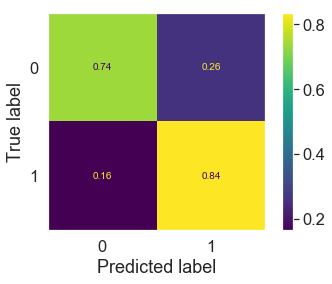

Confusion Matrix - Testing


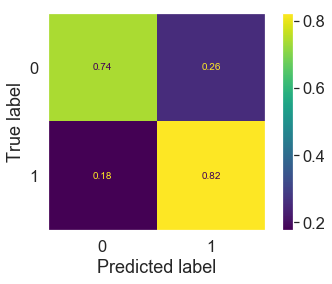

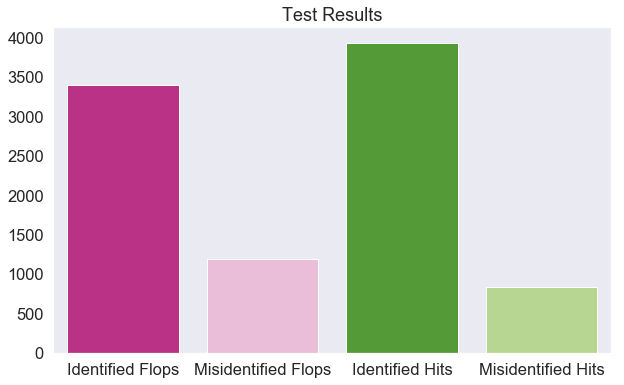

In [61]:
forest_auc_train, forest_auc_test = classifier_results(best_random_forest, 
                                                       X_train, 
                                                       X_test, 
                                                       y_train,
                                                       y_test, 
                                                       forest_train_preds,                    
                                                       forest_test_preds)

The random forest AUC is a little lower than the SVM and KNN models, but has a better false positive rate. We have all-around good accuracy, precision and recall scores as well. This is so far our most well-rounded model as it is less likely to mislabel flops. So far this and the SVM are in contention for our final model.

In [62]:
best_aucs['forest'] = [forest_auc_train, forest_auc_test]
best_models.append(best_random_forest)

### Fine Tuning Adaboost

In [63]:
start = datetime.datetime.now()

ada = AdaBoostClassifier()
ada_param_grid = {'n_estimators': [30, 50, 70, 100],
                   'learning_rate': [1, .25, .5, .75, .1]}
ada_gridsearch = grid_fit(ada, ada_param_grid, X_train, y_train)

end = datetime.datetime.now()
print(f'Time elapsed: {end-start}')

Best params: {'learning_rate': 0.25, 'n_estimators': 100}
Best score: 0.7791244950947688
Time elapsed: 0:01:38.332544


In [64]:
best_rate = ada_gridsearch.best_params_['learning_rate']
best_estimators = ada_gridsearch.best_params_['n_estimators']
best_ada = AdaBoostClassifier(learning_rate=best_rate, n_estimators=best_estimators)
best_ada.fit(X_train, y_train)

ada_train_preds = best_ada.predict(X_train)
ada_test_preds = best_ada.predict(X_test)

Classification Report - Training
              precision    recall  f1-score   support

           0       0.83      0.70      0.76     10674
           1       0.75      0.86      0.80     11189

    accuracy                           0.78     21863
   macro avg       0.79      0.78      0.78     21863
weighted avg       0.79      0.78      0.78     21863

Classification Report - Testing
              precision    recall  f1-score   support

           0       0.82      0.70      0.76      4589
           1       0.75      0.86      0.80      4782

    accuracy                           0.78      9371
   macro avg       0.79      0.78      0.78      9371
weighted avg       0.79      0.78      0.78      9371

Training AUC: 0.79, Testing AUC: 0.787
Confusion Matrix - Training


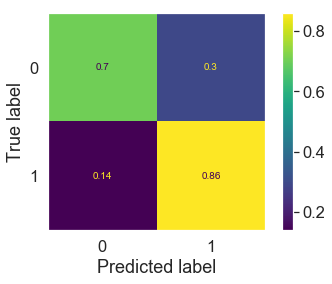

Confusion Matrix - Testing


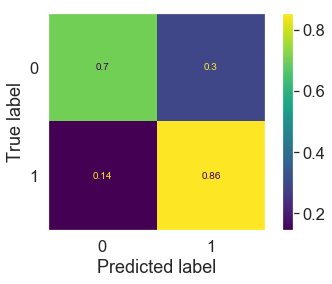

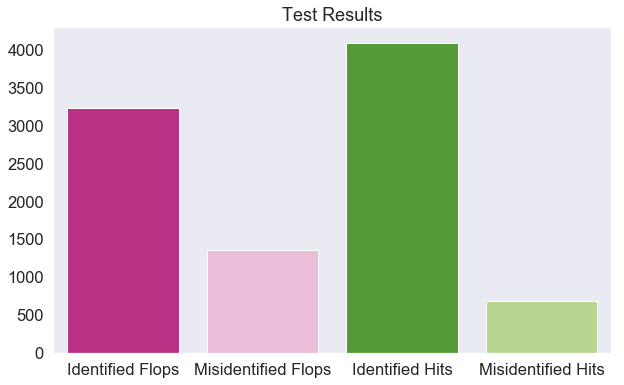

In [65]:
ada_train_auc, ada_test_auc = classifier_results(best_ada, 
                                                 X_train, 
                                                 X_test, 
                                                 y_train, 
                                                 y_test, 
                                                 ada_train_preds, 
                                                 ada_test_preds)

We still have good scores all around the classification table, however we have a high false positive rate again. Our AUC is fine, indicating the adaboost model has a 78.7% chance to separate the hits from flops. Overall this is another reasonable model, but I would still choose between the SVM and the random forest model.

In [66]:
best_aucs['adaboost'] = [ada_train_auc, ada_test_auc]
best_models.append(best_ada)

## Analyzing Results

Now that we have our finely tuned models, let's compare them. Here are the models's training and testing ROC curves.

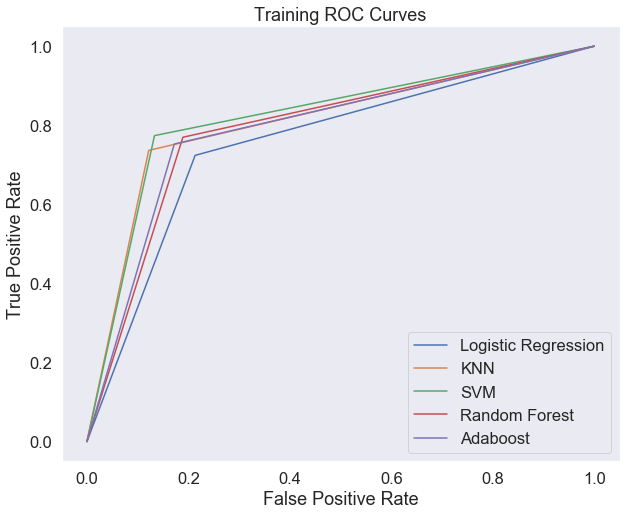

In [67]:
fig = plt.figure(figsize=(10,8))
for i, model in enumerate(best_models):
    fpr, tpr, thresholds = roc_curve(model.predict(X_train), y_train)
    plt.plot(fpr, tpr, label=names[i])
plt.title('Training ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

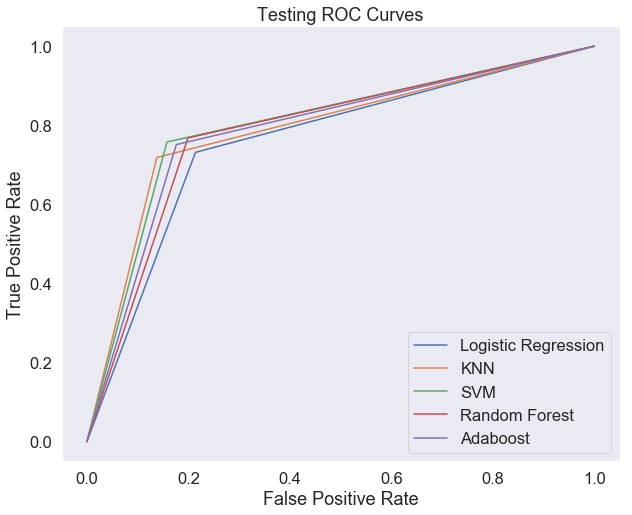

In [68]:
fig = plt.figure(figsize=(10,8))
for i, model in enumerate(best_models):
    fpr, tpr, thresholds = roc_curve(model.predict(X_test), y_test)
    plt.plot(fpr, tpr, label=names[i])
plt.title('Testing ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Except for the pretty obvious overfitting of the KNN, all of the models have similar results. The SVM does just a hair better than the others on both training and test datasets. Now we will look at the aucs and compare them to the baseline accuracies.

In [69]:
auc_df = pd.DataFrame.from_dict(best_aucs, orient='index', columns = ['train_auc', 'test_auc'])
auc_df

,train_auc,test_auc
logreg,0.755,0.759
knn,0.807,0.790
svm,0.820,0.800
forest,0.790,0.784
adaboost,0.790,0.787


In [70]:
baselines

,classifier,train_score,test_score
0,Logistic Regression,0.749440,0.753495
1,KNN,0.820153,0.749546
2,SVM,0.803549,0.790204
3,Random Forest,0.999131,0.799701
4,Adaboost,0.780863,0.776438


All models except the random forest model improved over our baseline models, though by small amounts. Our support vectom machine model performed the best overall in both the baseline and tuned version. This is the model that I would choose for classification as it performs the strongest across all four classification possibilities. However, all of our models had a false positive rate as a weak point, and if we were trying to account for this, I would suggest using the random_forest model.

To get a sense of what is going on in the model, I will now look at the most important features. First we will check the svm model to see what the model is basing its predictions on.

In [71]:
perm_svm = PermutationImportance(best_svm).fit(X_test, y_test)
eli5.show_weights(perm_svm, feature_names=list(X_train.columns))

Weight,Feature
0.0857 ± 0.0039,instrumentalness
0.0527 ± 0.0063,acousticness
0.0498 ± 0.0043,danceability
0.0359 ± 0.0082,energy
0.0263 ± 0.0067,duration_ms
0.0191 ± 0.0047,valence
0.0190 ± 0.0019,loudness
0.0098 ± 0.0034,speechiness
0.0052 ± 0.0008,liveness
0.0047 ± 0.0046,sections


The most important feature seems to be how instrumental a track is. Time signature seems to be a miss as the model has all 4 time signature columns at the bottom. Let's try rebooting our model only using the features that have at least a .005 weight and see if that changes our auc.

In [72]:
mask = perm_svm.feature_importances_ > .005
features_svm = X_train.columns[mask]
best_svm.fit(X_train[features_svm], y_train)

svm_train_preds = best_svm.predict(X_train[features_svm])
svm_test_preds = best_svm.predict(X_test[features_svm])

In [73]:
fpr, tpr, thresholds = roc_curve(svm_train_preds, y_train)
svm_auc_train = round(auc(fpr, tpr),3)

fpr, tpr, thresholds = roc_curve(svm_test_preds, y_test)
svm_auc_test = round(auc(fpr, tpr),3)
print(f'Training AUC: {svm_auc_train}, Testing AUC: {svm_auc_test}')

Training AUC: 0.804, Testing AUC: 0.799


The auc went down, so we will stick with using all of our predictors. Let's check the random forest to see if we can improve that model.

In [74]:
perm_forest = PermutationImportance(best_random_forest).fit(X_test, y_test)
eli5.show_weights(perm_forest, feature_names=list(X_train.columns))

Weight,Feature
0.1030 ± 0.0080,instrumentalness
0.0495 ± 0.0024,acousticness
0.0321 ± 0.0023,duration_ms
0.0272 ± 0.0050,danceability
0.0077 ± 0.0012,energy
0.0061 ± 0.0022,speechiness
0.0036 ± 0.0012,loudness
0.0023 ± 0.0023,valence
0.0011 ± 0.0009,time_signature_4
0.0009 ± 0.0005,liveness


Interestingly the lists are pretty similar at the top and both models have instrumentalness and accousticness at the top of the list. The weights are a little bit different between the lists with the random forest using a much higher weight for the first couple of features and the svm using a closer spread. Let's try only using the features that have a high weight for the random forest and see if we can improve our auc score.

In [75]:
mask = perm_forest.feature_importances_ > .005
features_forest = X_train.columns[mask]
best_random_forest.fit(X_train[features_forest], y_train)

forest_train_preds = best_random_forest.predict(X_train[features_forest])
forest_test_preds = best_random_forest.predict(X_test[features_forest])

In [76]:
fpr, tpr, thresholds = roc_curve(forest_train_preds, y_train)
forest_auc_train = round(auc(fpr, tpr),3)

fpr, tpr, thresholds = roc_curve(forest_test_preds, y_test)
forest_auc_test = round(auc(fpr, tpr),3)
print(f'Training AUC: {forest_auc_train}, Testing AUC: {forest_auc_test}')

Training AUC: 0.788, Testing AUC: 0.781


Again the auc went down when we cut predictors. We will use the model with all predictors.

## Summary

We built two models that we can use to predict if a track will be a commercial hit. Our SVM model has a higher overall accuracy, correctly classifying tracks about 80% of the time. However, if we are trying to conservatively predict flops so as to avoid risky investments, then we should be using the random forest classifier. This model had the lowest rate of false positives, meaning we have a lower chance of investing in marketing campaigns that are destined to fail. Further more, when looking at what makes a commercially successful track, we were able to distinguish key features used by both models. Instrumentalness is key it seems as both models placed that as the strongest feature. Accousticness, danceability, energy and duration round out the rest of the top 5 in both models, though not in the same order. When deciding on which tracks to support, we should be keeping these key factors in mind.

## Future Work

There are a few ways that I think we can expand on this project. First, we can narrow the focus of our predictions down to just classifying tracks released in the last 5 or 10 years. This will allow us to focus on the market demands of the current generation, rather than looking at overarching trends over the last several decades. Second, I would look at testing this model by genre of music. Will we have similar results when comparing country music and opera music? Perhaps we can get a better accuracy if we train and use our model on individual genres, rather than all tracks. Finally, I would also like to incorporate statistics about artists as well. By including descriptive features about the artists, such as vocal timbre it may help us achieve better accuracy as well.

## Demonstration

Enter track titles in the cell below to see how the SVM and Random Forest models classify them.

In [77]:
# Enter track titles into song_list
best_svm.fit(X_train, y_train)
best_random_forest.fit(X_train, y_train)

song_list = ['...Baby One More Time', 'Bohemian Rhapsody']

sample_test = demo(song_list, df_combined, data, scaler, best_svm, best_random_forest)

SVM Results:
...Baby One More Time by Britney Spears: hit
Bohemian Rhapsody by Queen: hit
Bohemian Rhapsody by Queen: hit
Bohemian Rhapsody by Queen: hit


Random Forest Results:
...Baby One More Time by Britney Spears: hit
Bohemian Rhapsody by Queen: hit
Bohemian Rhapsody by Queen: hit
Bohemian Rhapsody by Queen: hit
